In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
"""
Imports
"""

import os
from dataclasses import dataclass

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as T
import torchvision.transforms.functional as TF
import lightning as L
import lightning.pytorch as pl

torch.set_float32_matmul_precision('medium')

import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline
import seaborn as sns
sns.set_theme(style="darkgrid")

# Check Data Module

In [15]:
from train import DocDenoiserDataModule
dm = DocDenoiserDataModule()

In [16]:
dm.setup(stage='fit')

16:11:39 | INFO     | Total Dataset       : 981 samples
16:11:39 | INFO     | Train Dataset       : 784 samples
16:11:39 | INFO     | Validation Dataset  : 197 samples


In [17]:
dl = dm.train_dataloader()
batch = next(iter(dl))

In [18]:
X_noisy, X = batch
X_noisy.shape, X.shape

(torch.Size([2, 1, 400, 400]), torch.Size([2, 1, 400, 400]))

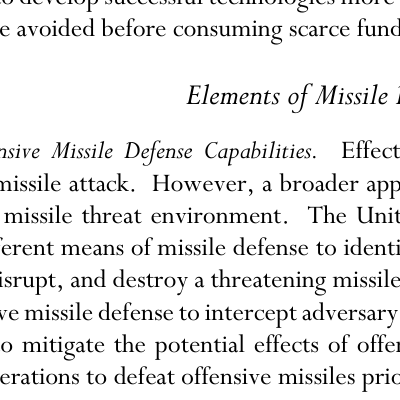

In [19]:
from utils.visualize import tensor_to_pil_image
tensor_to_pil_image(X[0])

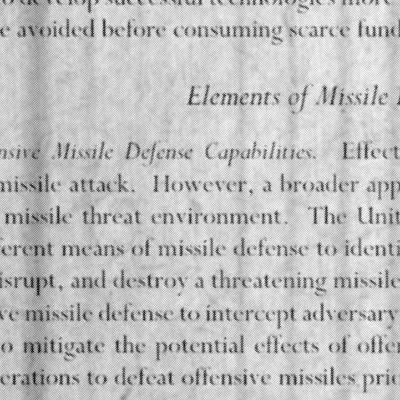

In [20]:
tensor_to_pil_image(X_noisy[0])

# Check Model

In [21]:
samples = torch.randn_like(X_noisy)
samples.shape

torch.Size([2, 1, 400, 400])

In [40]:
from train import DocDenoiserAutoencoder
model = DocDenoiserAutoencoder()

In [41]:
out = model(samples)
out.shape

16:49:50 | DEBUG    | Start! : torch.Size([2, 1, 400, 400])
16:49:53 | DEBUG    | before max pool : torch.Size([2, 512, 400, 400])
16:49:53 | DEBUG    | after max pool : torch.Size([2, 512, 200, 200])
16:49:54 | DEBUG    | after conv2d 4 : torch.Size([2, 1024, 200, 200])
16:49:56 | DEBUG    | before Upsample : torch.Size([2, 256, 200, 200])
16:49:56 | DEBUG    | after Upsample : torch.Size([2, 256, 400, 400])
16:49:56 | DEBUG    | after conv2d 4 : torch.Size([2, 1, 400, 400])
16:49:56 | DEBUG    | Done! : torch.Size([2, 1, 400, 400])


torch.Size([2, 1, 400, 400])